# **Exercício**
## M14- Fundamentos da Descoberta de Dados Pré Processamento dos Dados - A primeira etapa Pré Modelagem

Para nossa atividade usaremos uma base de churn também, porém essa base não diz respeito a serviços bancários e sim serviços de internet, telefone e tv - Telecomunicação.

Vamos realizar aqui as etapas de limpeza e tratamento de dados vistos durante a aula, porém aplicados a essa base nova.
Legenda dos dados:

*   **CustomerID** : Esse é o ID único de cada cliente nosso da rede de produtos de telecomunicação.

*   **Genero** : O genero dos nossos clientes.

*   **Idoso** : Se nosso cliente tem acima de 60 anos ou não. (Sim = 1 | Não = 0)

*   **Casado** : Se nosso cliente é casado ou não.

*   **Dependents** : Se cliente tem dependentes.

*   **Tempo_como_Cliente** : Tempo em meses que nosso cliente está com a nossa empresa.

*   **PhoneService** : Se ele contratou serviço telefônico com a nossa empresa.

*   **Servico_Internet** : Qual o tipo de serviço de internet contratado.

*   **Servico_Seguranca** : Se ele contratou serviço de segurança com a nossa empresa.

*   **Suporte_Tecnico** : Se já acionou o suporte técnico.

*   **StreamingTV** : Se ele contratou serviço de streaming para TV.

*   **Tipo_Contrato** : Qual o tipo de contrato dos nossos clientes, se era mensal, anual etc.

*   **Tipo_Contrato** : Qual o tipo de contrato dos nossos clientes, se era mensal, anual etc.

*   **PaymentMethod** : Forma de Pagamento.

*   **Pagamento_Mensal** : Quanto o cliente pagava mensalmente.

*   **Total_Pago** : Total já pago pelo cliente para nossa companhia.

*   **Churn** : Nossa coluna mais importante, se nosso cliente nos abandonou ou não.

### **Objetivos**
#### 1 - Carregue a base, verifique se os tipos de dados estão de acordo com cada coluna e caso não estejam realize a transformação dos tipos de dados.
#### 2 - Esse exercício faremos por etapas:
A) Verifique se temos colunas com dados faltantes e traga a % dos dados faltantes por coluna.\
B) Exclua nessa etapa as linhas das colunas com dados faltantes que você analisar que esse método é o ideal. Justifique o motivo de estar excluindo essas linhas.\
C) Nessa etapa substitua pela média, mediana ou moda as linhas das colunas com valores faltantes que você analisou e entendeu que esse era o melhor método. Não se esqueça de justificar sua escolha.
#### 3 - Verifique se encontramos valores digitados incorretamente, ou com letras maiusculas ou minusculas, ou até mesmo mesmos valores porém escritos de forma dirente e corrija.
#### [EXTRA] 4 - Caso deseje, para manter um padrão na sua base, renomeie as colunas ou deixand

In [139]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


In [47]:
#Lembrem-se sempre de alterar a importação dos dados de acordo com o diretório de vocês.
df = pd.read_csv("CHURN_TELECON_MOD08_TAREFA.csv", delimiter=';')
df

,customerID,Genero,Idoso,Casado,Dependents,Tempo_como_Cliente,PhoneService,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,StreamingTV,Tipo_Contrato,PaymentMethod,Pagamento_Mensal,Total_Pago,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,DSL,No,No,No,Month-to-month,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,DSL,Yes,No,No,One year,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,DSL,Yes,No,No,Month-to-month,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,DSL,Yes,Yes,No,One year,Bank transfer (automatic),NaN,1840.75,No
4,9237-HQITU,NaN,0,No,No,2,Yes,Fiber optic,No,No,No,Month-to-month,Electronic check,NaN,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,6188-UXBBR,Female,0,Yes,No,38,Yes,No,No internet service,No internet service,No internet service,One year,Credit card (automatic),20.25,814.75,No
2496,2333-KWEWW,Male,0,No,No,18,Yes,No,No internet service,No internet service,No internet service,Two year,Credit card (automatic),20.05,388.60,No
2497,5702-SKUOB,Female,0,Yes,No,4,Yes,No,No internet service,No internet service,No internet service,Month-to-month,Mailed check,19.60,93.45,No
2498,1134-YWTYF,Male,0,Yes,No,27,Yes,DSL,No,Yes,No,Month-to-month,Electronic check,53.80,1389.85,No


#### 1 - Carregue a base, verifique se os tipos de dados estão de acordo com cada coluna e caso não estejam realize a transformação dos tipos de dados.
Executando a linha abaixa temos uma visão ampla dos conjunto de dados.
```python
df.info()
```

| Column               | Non-Null Count | Dtype   |
|----------------------|---------------|-------- |
| customerID          | 2500 non-null  | object  |
| Genero              | 2488 non-null  | object  |
| Idoso               | 2500 non-null  | int64   |
| Casado              | 2500 non-null  | object  |
| Dependents          | 2500 non-null  | object  |
| Tempo_como_Cliente  | 2500 non-null  | int64   |
| PhoneService        | 1018 non-null  | object  |
| Servico_Internet    | 2500 non-null  | object  |
| Servico_Seguranca   | 2500 non-null  | object  |
| Suporte_Tecnico     | 2500 non-null  | object  |
| StreamingTV         | 2500 non-null  | object  |
| Tipo_Contrato       | 2500 non-null  | object  |
| PaymentMethod       | 2500 non-null  | object  |
| Pagamento_Mensal    | 2175 non-null  | float64 |
| Total_Pago          | 2500 non-null  | float64 |
| Churn               | 2495 non-null  | object  |

* O dataset possui 16 colunas e 2500 linhas. Quatro colunas possuem valores nulos, com as seguintes quantidades:**Genero (12)**, **PhoneService (1482)**, **Pagamento_Mensal (325)** e **Churn (5)**.
* 7 Colunas podem são classificadas como objeto Yes/No e podem ser modificadas para inteiros 1/0. São elas: **Casado**, **Dependents**, **PhoneService**, **Servico_Seguranca**, **Suporte_Tecnico**, **StreamingTV**, **Churn**.
* As colunas **Serviço_seguranca**, **Suporte_tecnico**, **StremingTV** são dependentes da coluna Servico_internet. Desta forma, não se aplica no caso de não contratação( zero ) de serviço de internet 

Para conversão de todas respostas 'yes' e No em 1 e zero:
```python
df = df.replace({'Yes': 1, 'No': 0})
```
Assim, os valores foram convertidos para inteiros, exceto nas seguintes colunas: 1)**Serviço_Segurança**, **Suporte_Técnico** e **StreamingTV**: mantiveram alguns valores do tipo string devido a respostas condicionadas à contratação de internet.2) **PhoneService** e **Churn**: convertidos para float64 devido à presença de valores nulos.

In [140]:
df = df.replace({'Yes': 1, 'No': 0})

# 2 - Esse exercício faremos por etapas:
A) Verifique se temos colunas com dados faltantes e traga a % dos dados faltantes por coluna.\
A tabela 1 abaixo apresenta os valores faltantes

| Categoria            | Percentual (%) |
|----------------------|---------------|
| customerID          | 0.00          |
| Genero              | 0.48          |
| Idoso               | 0.00          |
| Casado              | 0.00          |
| Dependents          | 0.00          |
| Tempo_como_Cliente  | 0.00          |
| PhoneService        | 59.28         |
| Servico_Internet    | 0.00          |
| Servico_Seguranca   | 0.00          |
| Suporte_Tecnico     | 0.00          |
| StreamingTV         | 0.00          |
| Tipo_Contrato       | 0.00          |
| PaymentMethod       | 0.00          |
| Pagamento_Mensal    | 13.00         |
| Total_Pago         | 0.00          |
| Churn               | 0.20          |
**tabela 1**: percentual de dados dados nulos.

In [141]:
#valores percentuais de dados faltantes
print(f"{'Categoria':<20} {'Percentual(%)':>5}")
print("-" * 34)
print((df.isnull().sum()/len(df))*100)

Categoria            Percentual(%)
----------------------------------
customerID             0.000000
Genero                 0.000000
Idoso                  0.000000
Casado                 0.000000
Dependents             0.000000
Tempo_como_Cliente     0.000000
PhoneService          59.565916
Servico_Internet       0.000000
Servico_Seguranca      0.000000
Suporte_Tecnico        0.000000
StreamingTV            0.000000
Tipo_Contrato          0.000000
PaymentMethod          0.000000
Pagamento_Mensal      12.580386
Total_Pago             0.000000
Churn                  0.000000
dtype: float64


B) Exclua nessa etapa as linhas das colunas com dados faltantes que você analisar que esse método é o ideal. Justifique o motivo de estar excluindo essas linhas.
Como critério de exclusão, vamos considerar que colunas os quais possuem um percentual de dados nulos inferior a 3% podem ter essas linha automaticamente excluidas. Assim podemos excluir as linhas nulas em **churn** e **genero** com o comando:

```python
df.dropna(subset=['Churn', 'Genero'],inplace=True)
```



In [142]:
#removendo linhas nulas em churn e Genero
df.dropna(subset=['Churn', 'Genero'],inplace=True)
#verificando
print(df.isnull().sum())

customerID               0
Genero                   0
Idoso                    0
Casado                   0
Dependents               0
Tempo_como_Cliente       0
PhoneService          1482
Servico_Internet         0
Servico_Seguranca        0
Suporte_Tecnico          0
StreamingTV              0
Tipo_Contrato            0
PaymentMethod            0
Pagamento_Mensal       313
Total_Pago               0
Churn                    0
dtype: int64


C) Nessa etapa substitua pela média, mediana ou moda as linhas das colunas com valores faltantes que você analisou e entendeu que esse era o melhor método. Não se esqueça de justificar sua escolha.\
**Dica variáveis numéricas:** Não se esqueça de verificar a distrbuição dos dados, média e mediana.\
**Dica variáveis categóricas:** Caso precise substituir uma variável categórica utilize um gráfico de barras para verificar a que mais aparece e utilizar ela na substituição.
Ou você pode optar por excluir a coluna, mas justifique sua escolha.

Caso opte por substituir você pode utilizar a função fillna:
df['SUACOLUNA'].fillna("VALOR QUE SUBSTITUIRA O NULO", inplace=True)
Ela funcionará como a replace.

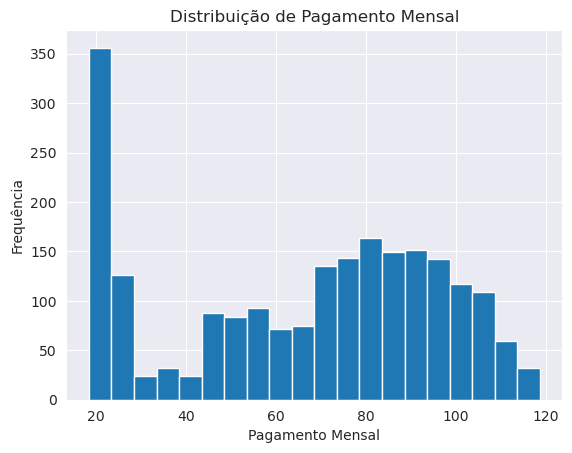

count    2175.000000
mean       65.607563
std        29.931520
min        18.400000
25%        39.500000
50%        71.450000
75%        90.250000
max       118.650000
Name: Pagamento_Mensal, dtype: float64


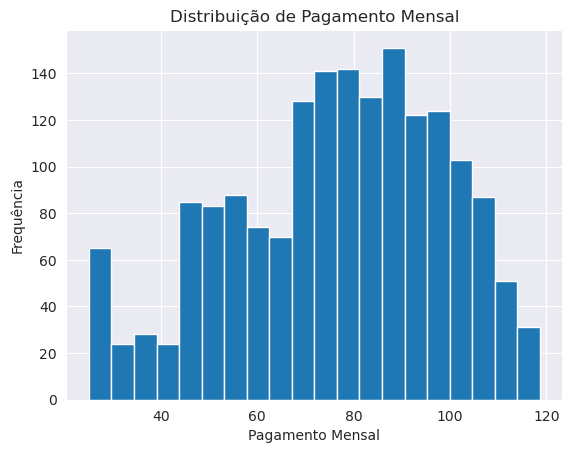

count    1751.000000
mean       76.482010
std        22.478041
min        25.050000
25%        60.150000
50%        79.950000
75%        94.300000
max       118.650000
Name: Pagamento_Mensal, dtype: float64


In [178]:
df['Churn'] = df['Churn'].astype(int)
#print(df['Pagamento_Mensal'].describe())

# plt.figure(figsize=(8, 6))
# sns.boxplot(data=df, y='Pagamento_Mensal', color='skyblue')
# plt.title('Boxplot da Coluna de Salário')
# plt.ylabel('Salario_Anual')
# plt.show()


# sns.set_style('darkgrid')
# plt.figure(figsize=(10, 6))
# sns.histplot(x='Pagamento_Mensal',data=df, bins=20)
# plt.title('Histograma da Coluna de Salário')
# plt.xlabel('Salario_Anual')
# plt.ylabel('Contagem')
# plt.show()


plt.hist(df['Pagamento_Mensal'], bins=20)
plt.title('Distribuição de Pagamento Mensal')
plt.xlabel('Pagamento Mensal')
plt.ylabel('Frequência')
plt.show()
print(df['Pagamento_Mensal'].describe())
df2 = df[df['Pagamento_Mensal'] > 25]

plt.hist(df2['Pagamento_Mensal'], bins=20)
plt.title('Distribuição de Pagamento Mensal')
plt.xlabel('Pagamento Mensal')
plt.ylabel('Frequência')
plt.show()
print(df2['Pagamento_Mensal'].describe())


In [ ]:
print(df['PhoneService'].value_counts())

df_phone0 = df[df['PhoneService'] ==0] #86
df_phone1 = df[df['PhoneService'] ==1] 

len(df)
#df_phone0

# 3 - Verifique se encontramos valores digitados incorretamente, ou com letras maiusculas ou minusculas, ou até mesmo mesmos valores porém escritos de forma dirente e corrija.

In [ ]:
#seu código aqui

# [EXTRA] 4 - Caso deseje, para manter um padrão na sua base, renomeie as colunas ou deixand